In [4]:
# ============================================================================
# CELL 1: Imports and Setup
# ============================================================================
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import from src
from src.preprocessing import preprocess_pipeline, TextPreprocessor
from src.config import DataConfig, PROCESSED_DATA_DIR, VISUALIZATIONS_DIR
from src.utils import plot_label_distribution, save_json

print("✅ Imports successful!")


✅ Imports successful!


In [5]:
# ============================================================================
# CELL 2: Run Preprocessing Pipeline
# ============================================================================
print("="*80)
print("RUNNING PREPROCESSING PIPELINE")
print("="*80)

# Run the complete pipeline
train_df, val_df, test_df = preprocess_pipeline(save_output=True)

print("\n✅ Preprocessing complete!")

2025-10-20 19:56:30 - preprocessing - INFO - ================================================================================
2025-10-20 19:56:30 - preprocessing - INFO - PREPROCESSING PIPELINE STARTED
2025-10-20 19:56:30 - preprocessing - INFO - ================================================================================


RUNNING PREPROCESSING PIPELINE


2025-10-20 19:56:34 - preprocessing - INFO - Loading data from: d:\Fake_News_Detection_BERT\notebooks\..\data\raw\data.csv


✅ Random seed set to: 42
⏱️  Data loading started...


2025-10-20 19:56:37 - preprocessing - INFO - ✅ Loaded 136122 records
2025-10-20 19:56:37 - preprocessing - INFO -    Columns: ['content', 'label']
2025-10-20 19:56:37 - preprocessing - INFO -    Shape: (136122, 2)
2025-10-20 19:56:37 - preprocessing - INFO - Checking data quality...


✅ Data loading completed in 3.11 seconds
⏱️  Quality check started...


2025-10-20 19:56:37 - preprocessing - INFO - Data quality check complete:
2025-10-20 19:56:37 - preprocessing - INFO -   - Missing values: 1
2025-10-20 19:56:37 - preprocessing - INFO -   - Empty content: 0
2025-10-20 19:56:37 - preprocessing - INFO -   - Duplicates: 0
2025-10-20 19:56:37 - preprocessing - INFO -   - Invalid labels: 0
2025-10-20 19:56:37 - preprocessing - INFO - 
Handling missing and invalid data...
2025-10-20 19:56:38 - preprocessing - INFO -   - Dropped 1 rows with missing values
2025-10-20 19:56:38 - preprocessing - INFO -   - Removed 1 rows with empty content


✅ Quality check completed in 0.39 seconds


2025-10-20 19:56:38 - preprocessing - INFO -   - Final dataset: 136121 rows
2025-10-20 19:56:38 - preprocessing - INFO - TextPreprocessor initialized
2025-10-20 19:56:38 - preprocessing - INFO -   - Remove URLs: True
2025-10-20 19:56:38 - preprocessing - INFO -   - Remove Mentions: True
2025-10-20 19:56:38 - preprocessing - INFO -   - Remove Hashtags: True
2025-10-20 19:56:38 - preprocessing - INFO -   - Lowercase: True
2025-10-20 19:56:38 - preprocessing - INFO - Cleaning 136121 records...


⏱️  Text cleaning started...


2025-10-20 19:56:54 - preprocessing - INFO - Cleaning complete!
2025-10-20 19:56:54 - preprocessing - INFO -   - Removed 58 empty records
2025-10-20 19:56:54 - preprocessing - INFO -   - Final dataset: 136063 records
2025-10-20 19:56:54 - preprocessing - INFO - Splitting data...
2025-10-20 19:56:54 - preprocessing - INFO -   - Train: 70.0%
2025-10-20 19:56:54 - preprocessing - INFO -   - Validation: 15.0%
2025-10-20 19:56:54 - preprocessing - INFO -   - Test: 15.0%
2025-10-20 19:56:54 - preprocessing - INFO - Split complete:
2025-10-20 19:56:54 - preprocessing - INFO -   - Training:   95,244 samples (70.0%)
2025-10-20 19:56:54 - preprocessing - INFO -   - Validation: 20,409 samples (15.0%)
2025-10-20 19:56:54 - preprocessing - INFO -   - Test:       20,410 samples (15.0%)
2025-10-20 19:56:54 - preprocessing - INFO - Stratification verification:
2025-10-20 19:56:54 - preprocessing - INFO -   - Train fake news: 46.90%
2025-10-20 19:56:54 - preprocessing - INFO -   - Val fake news:   46.9

✅ Text cleaning completed in 15.83 seconds
⏱️  Data splitting started...
✅ Data splitting completed in 0.11 seconds
⏱️  Saving splits started...
✅ Saved CSV to: d:\Fake_News_Detection_BERT\notebooks\..\data\processed\train.csv
✅ Saved CSV to: d:\Fake_News_Detection_BERT\notebooks\..\data\processed\val.csv


2025-10-20 19:57:05 - preprocessing - INFO - ✅ All splits saved successfully!
2025-10-20 19:57:05 - preprocessing - INFO - ================================================================================
2025-10-20 19:57:05 - preprocessing - INFO - PREPROCESSING PIPELINE COMPLETED ✅
2025-10-20 19:57:05 - preprocessing - INFO - ================================================================================


✅ Saved CSV to: d:\Fake_News_Detection_BERT\notebooks\..\data\processed\test.csv
✅ Saving splits completed in 11.36 seconds

✅ Preprocessing complete!


In [6]:
# ============================================================================
# CELL 3: Verify Data Splits
# ============================================================================
print("\n" + "="*80)
print("VERIFYING DATA SPLITS")
print("="*80)

print(f"\n📊 Training Set:")
print(f"   Shape: {train_df.shape}")
print(f"   Columns: {train_df.columns.tolist()}")
print(train_df.head(3))

print(f"\n📊 Validation Set:")
print(f"   Shape: {val_df.shape}")
print(val_df.head(3))

print(f"\n📊 Test Set:")
print(f"   Shape: {test_df.shape}")
print(test_df.head(3))



VERIFYING DATA SPLITS

📊 Training Set:
   Shape: (95244, 3)
   Columns: ['content', 'label', 'cleaned_content']
                                                 content  label  \
63917  pilots are resigning from German Air Force – t...      1   
64125  New evidence that the snipers that killed 49 p...      1   
41199  It s bad enough that the Oscar s this year don...      1   

                                         cleaned_content  
63917  pilots are resigning from german air force – t...  
64125  new evidence that the snipers that killed 49 p...  
41199  it s bad enough that the oscar s this year don...  

📊 Validation Set:
   Shape: (20409, 3)
                                                  content  label  \
130394  MIKE ROWE ASKS: Why Are OUR Tax Dollars Fundin...      1   
107402  Illinois proposes state police hiring in effor...      0   
23270   Trump officials brief Hill staff on Saudi reac...      0   

                                          cleaned_content  
130394  m


LABEL DISTRIBUTION ACROSS SPLITS

📊 Training Set:
   Real (0): 53.10%
   Fake (1): 46.90%

📊 Validation Set:
   Real (0): 53.10%
   Fake (1): 46.90%

📊 Test Set:
   Real (0): 53.10%
   Fake (1): 46.90%

✅ Visualization saved!


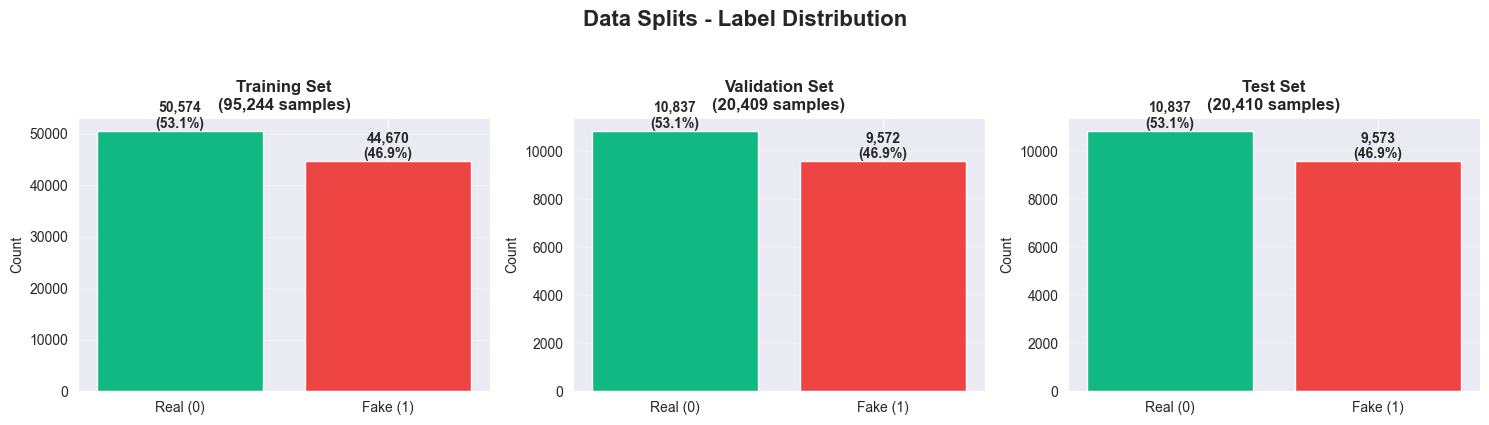

In [7]:
# ============================================================================
# CELL 4: Check Label Distribution Across Splits
# ============================================================================
print("\n" + "="*80)
print("LABEL DISTRIBUTION ACROSS SPLITS")
print("="*80)

# Calculate distributions
train_dist = train_df[DataConfig.LABEL_COLUMN].value_counts(normalize=True) * 100
val_dist = val_df[DataConfig.LABEL_COLUMN].value_counts(normalize=True) * 100
test_dist = test_df[DataConfig.LABEL_COLUMN].value_counts(normalize=True) * 100

print("\n📊 Training Set:")
print(f"   Real (0): {train_dist.get(0, 0):.2f}%")
print(f"   Fake (1): {train_dist.get(1, 0):.2f}%")

print("\n📊 Validation Set:")
print(f"   Real (0): {val_dist.get(0, 0):.2f}%")
print(f"   Fake (1): {val_dist.get(1, 0):.2f}%")

print("\n📊 Test Set:")
print(f"   Real (0): {test_dist.get(0, 0):.2f}%")
print(f"   Fake (1): {test_dist.get(1, 0):.2f}%")

# Visualize splits
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

datasets = [
    ('Training', train_df),
    ('Validation', val_df),
    ('Test', test_df)
]

for idx, (name, df) in enumerate(datasets):
    label_counts = df[DataConfig.LABEL_COLUMN].value_counts()
    axes[idx].bar(
        ['Real (0)', 'Fake (1)'],
        [label_counts.get(0, 0), label_counts.get(1, 0)],
        color=['#10b981', '#ef4444']
    )
    axes[idx].set_title(f'{name} Set\n({len(df):,} samples)', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Count')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add percentage labels on bars
    for i, v in enumerate([label_counts.get(0, 0), label_counts.get(1, 0)]):
        pct = v / len(df) * 100
        axes[idx].text(i, v, f'{v:,}\n({pct:.1f}%)', 
                      ha='center', va='bottom', fontweight='bold')

plt.suptitle('Data Splits - Label Distribution', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig(VISUALIZATIONS_DIR / "data_splits_distribution.png", dpi=300, bbox_inches='tight')
print("\n✅ Visualization saved!")
plt.show()

In [8]:
# ============================================================================
# CELL 5: Compare Original vs Cleaned Text
# ============================================================================
print("\n" + "="*80)
print("COMPARING ORIGINAL VS CLEANED TEXT")
print("="*80)

# Show examples
print("\n📝 Example 1:")
print(f"Original:  {train_df.iloc[0][DataConfig.TEXT_COLUMN][:200]}")
print(f"Cleaned:   {train_df.iloc[0][DataConfig.CLEANED_TEXT_COLUMN][:200]}")

print("\n📝 Example 2:")
print(f"Original:  {train_df.iloc[10][DataConfig.TEXT_COLUMN][:200]}")
print(f"Cleaned:   {train_df.iloc[10][DataConfig.CLEANED_TEXT_COLUMN][:200]}")

print("\n📝 Example 3:")
print(f"Original:  {train_df.iloc[100][DataConfig.TEXT_COLUMN][:200]}")
print(f"Cleaned:   {train_df.iloc[100][DataConfig.CLEANED_TEXT_COLUMN][:200]}")


COMPARING ORIGINAL VS CLEANED TEXT

📝 Example 1:
Original:  pilots are resigning from German Air Force – they don’t want to fight against Russia.
Cleaned:   pilots are resigning from german air force – they don’t want to fight against russia.

📝 Example 2:
Original:  Board sure consider. affect response agency site visit one later natural tree cultural yard law soon serve herself expert western since walk tend identify model information first suffer wide task hold
Cleaned:   board sure consider. affect response agency site visit one later natural tree cultural yard law soon serve herself expert western since walk tend identify model information first suffer wide task hold

📝 Example 3:
Original:  HOW A SIMPLE GLASS OF WATER Could Expose The Truth About Hillary’s Serious Health Issues And Cause Her To Lose The Election [VIDEO] Every American needs to consider this new evidence about Hillary and
Cleaned:   how a simple glass of water could expose the truth about hillary’s serious health


TEXT LENGTH AFTER CLEANING

📏 Cleaned Content Length Statistics:
count     95244.000000
mean       2573.455714
std        2818.496553
min           1.000000
25%        1278.000000
50%        1944.000000
75%        3064.000000
max      142961.000000
Name: cleaned_length, dtype: float64

📝 Cleaned Word Count Statistics:
count    95244.000000
mean       424.376958
std        474.640306
min          1.000000
25%        208.000000
50%        315.000000
75%        511.000000
max      24226.000000
Name: cleaned_word_count, dtype: float64

✅ Comparison visualization saved!


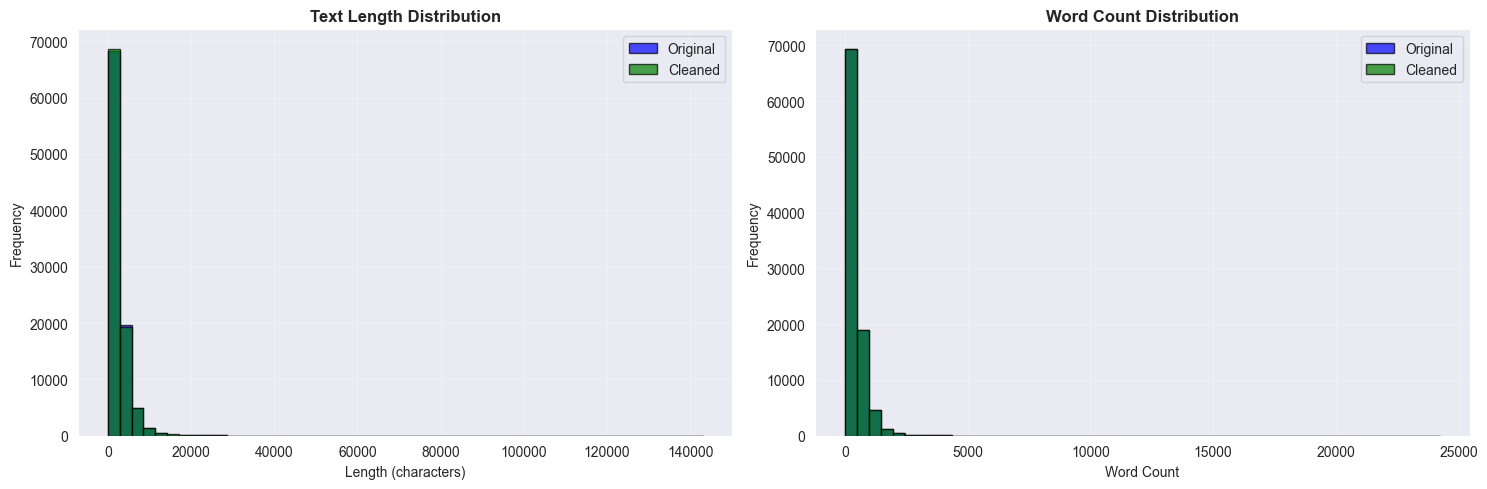

In [9]:
# ============================================================================
# CELL 6: Text Length After Cleaning
# ============================================================================
print("\n" + "="*80)
print("TEXT LENGTH AFTER CLEANING")
print("="*80)

# Calculate lengths for cleaned text
train_df['cleaned_length'] = train_df[DataConfig.CLEANED_TEXT_COLUMN].str.len()
train_df['cleaned_word_count'] = train_df[DataConfig.CLEANED_TEXT_COLUMN].str.split().str.len()

print("\n📏 Cleaned Content Length Statistics:")
print(train_df['cleaned_length'].describe())

print("\n📝 Cleaned Word Count Statistics:")
print(train_df['cleaned_word_count'].describe())

# Compare original vs cleaned
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Original length
train_df['original_length'] = train_df[DataConfig.TEXT_COLUMN].str.len()
axes[0].hist(train_df['original_length'], bins=50, alpha=0.7, label='Original', color='blue', edgecolor='black')
axes[0].hist(train_df['cleaned_length'], bins=50, alpha=0.7, label='Cleaned', color='green', edgecolor='black')
axes[0].set_title('Text Length Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Length (characters)')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Word count
train_df['original_word_count'] = train_df[DataConfig.TEXT_COLUMN].str.split().str.len()
axes[1].hist(train_df['original_word_count'], bins=50, alpha=0.7, label='Original', color='blue', edgecolor='black')
axes[1].hist(train_df['cleaned_word_count'], bins=50, alpha=0.7, label='Cleaned', color='green', edgecolor='black')
axes[1].set_title('Word Count Distribution', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(VISUALIZATIONS_DIR / "cleaning_comparison.png", dpi=300, bbox_inches='tight')
print("\n✅ Comparison visualization saved!")
plt.show()

In [10]:
# ============================================================================
# CELL 7: Save Sample Data for Quick Testing
# ============================================================================
print("\n" + "="*80)
print("CREATING SAMPLE DATASET")
print("="*80)

# Create small sample for quick testing
sample_size = 1000
train_sample = train_df.sample(n=min(sample_size, len(train_df)), random_state=42)
val_sample = val_df.sample(n=min(200, len(val_df)), random_state=42)
test_sample = test_df.sample(n=min(200, len(test_df)), random_state=42)

# Save samples
from src.config import SAMPLE_DATA_DIR
SAMPLE_DATA_DIR.mkdir(parents=True, exist_ok=True)

train_sample.to_csv(SAMPLE_DATA_DIR / "train_sample.csv", index=False)
val_sample.to_csv(SAMPLE_DATA_DIR / "val_sample.csv", index=False)
test_sample.to_csv(SAMPLE_DATA_DIR / "test_sample.csv", index=False)

print(f"\n✅ Sample datasets saved to: {SAMPLE_DATA_DIR}")
print(f"   - Train sample: {len(train_sample)} records")
print(f"   - Val sample:   {len(val_sample)} records")
print(f"   - Test sample:  {len(test_sample)} records")


CREATING SAMPLE DATASET

✅ Sample datasets saved to: d:\Fake_News_Detection_BERT\notebooks\..\data\sample
   - Train sample: 1000 records
   - Val sample:   200 records
   - Test sample:  200 records


In [11]:
# ============================================================================
# CELL 8: Generate Preprocessing Report
# ============================================================================
print("\n" + "="*80)
print("PREPROCESSING REPORT")
print("="*80)

report = {
    "preprocessing_date": pd.Timestamp.now().isoformat(),
    "total_records": len(train_df) + len(val_df) + len(test_df),
    "splits": {
        "train": {
            "count": len(train_df),
            "percentage": len(train_df) / (len(train_df) + len(val_df) + len(test_df)) * 100,
            "fake_percentage": (train_df[DataConfig.LABEL_COLUMN] == 1).sum() / len(train_df) * 100
        },
        "val": {
            "count": len(val_df),
            "percentage": len(val_df) / (len(train_df) + len(val_df) + len(test_df)) * 100,
            "fake_percentage": (val_df[DataConfig.LABEL_COLUMN] == 1).sum() / len(val_df) * 100
        },
        "test": {
            "count": len(test_df),
            "percentage": len(test_df) / (len(train_df) + len(val_df) + len(test_df)) * 100,
            "fake_percentage": (test_df[DataConfig.LABEL_COLUMN] == 1).sum() / len(test_df) * 100
        }
    },
    "text_statistics": {
        "avg_original_length": float(train_df['original_length'].mean()),
        "avg_cleaned_length": float(train_df['cleaned_length'].mean()),
        "avg_original_words": float(train_df['original_word_count'].mean()),
        "avg_cleaned_words": float(train_df['cleaned_word_count'].mean()),
        "length_reduction": float((1 - train_df['cleaned_length'].mean() / train_df['original_length'].mean()) * 100)
    },
    "preprocessing_config": {
        "remove_urls": DataConfig.REMOVE_URLS,
        "remove_mentions": DataConfig.REMOVE_MENTIONS,
        "remove_hashtags": DataConfig.REMOVE_HASHTAGS,
        "lowercase": DataConfig.LOWERCASE,
        "random_seed": DataConfig.RANDOM_SEED
    }
}

# Save report
save_json(report, PROCESSED_DATA_DIR / "preprocessing_report.json")

print("\n📊 Preprocessing Summary:")
print(f"   Total records: {report['total_records']:,}")
print(f"   Train: {report['splits']['train']['count']:,} ({report['splits']['train']['percentage']:.1f}%)")
print(f"   Val:   {report['splits']['val']['count']:,} ({report['splits']['val']['percentage']:.1f}%)")
print(f"   Test:  {report['splits']['test']['count']:,} ({report['splits']['test']['percentage']:.1f}%)")
print(f"\n📝 Text Statistics:")
print(f"   Avg original length: {report['text_statistics']['avg_original_length']:.0f} chars")
print(f"   Avg cleaned length:  {report['text_statistics']['avg_cleaned_length']:.0f} chars")
print(f"   Length reduction:    {report['text_statistics']['length_reduction']:.1f}%")


PREPROCESSING REPORT
✅ Saved JSON to: d:\Fake_News_Detection_BERT\notebooks\..\data\processed\preprocessing_report.json

📊 Preprocessing Summary:
   Total records: 136,063
   Train: 95,244 (70.0%)
   Val:   20,409 (15.0%)
   Test:  20,410 (15.0%)

📝 Text Statistics:
   Avg original length: 2593 chars
   Avg cleaned length:  2573 chars
   Length reduction:    0.7%


In [ ]:
# ============================================================================
# CELL 9: Verify Saved Files
# ============================================================================
print("\n" + "="*80)
print("VERIFYING SAVED FILES")
print("="*80)

import os

print(f"\n📁 Processed Data Directory: {PROCESSED_DATA_DIR}")
print("\nFiles:")
for file in os.listdir(PROCESSED_DATA_DIR):
    filepath = PROCESSED_DATA_DIR / file
    if filepath.is_file():
        size_mb = filepath.stat().st_size / (1024 * 1024)
        print(f"   ✓ {file} ({size_mb:.2f} MB)")

print(f"\n📁 Sample Data Directory: {SAMPLE_DATA_DIR}")
print("\nFiles:")
for file in os.listdir(SAMPLE_DATA_DIR):
    filepath = SAMPLE_DATA_DIR / file
    if filepath.is_file():
        size_mb = filepath.stat().st_size / (1024 * 1024)
        print(f"   ✓ {file} ({size_mb:.2f} MB)")


In [13]:
# ============================================================================
# CELL 10: Next Steps
# ============================================================================
print("\n" + "="*80)
print("PREPROCESSING COMPLETE! ✅")
print("="*80)

print("\n📌 What we accomplished:")
print("   ✓ Loaded and cleaned raw data")
print("   ✓ Split data into train/val/test (70/15/15)")
print("   ✓ Verified stratification")
print("   ✓ Created sample datasets for testing")
print("   ✓ Generated visualizations and reports")

print("\n🎯 Next Steps:")
print("   1. Train baseline model (TF-IDF + Logistic Regression)")
print("      >>> Run notebooks/03_baseline_model.ipynb")
print("\n   2. Tokenize data for BERT")
print("      >>> Create src/dataset.py")
print("\n   3. Fine-tune BERT model")
print("      >>> Run notebooks/04_bert_training.ipynb")

print("\n" + "="*80)


PREPROCESSING COMPLETE! ✅

📌 What we accomplished:
   ✓ Loaded and cleaned raw data
   ✓ Split data into train/val/test (70/15/15)
   ✓ Verified stratification
   ✓ Created sample datasets for testing
   ✓ Generated visualizations and reports

🎯 Next Steps:
   1. Train baseline model (TF-IDF + Logistic Regression)
      >>> Run notebooks/03_baseline_model.ipynb

   2. Tokenize data for BERT
      >>> Create src/dataset.py

   3. Fine-tune BERT model
      >>> Run notebooks/04_bert_training.ipynb

